In [1]:
from random import randint, betavariate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta, date, time
import pylab
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 10)

## Классы и методы модуля DateTime

Модуль [DateTime](https://docs.python.org/3/library/datetime.html) предназначен для управления датами и временем в Python. 

In [2]:
Time_Now = datetime.now() # возвращает текущие дату и время (год, месяц, число, час, минута, секунда, микросекунда)
Time_Now 

datetime.datetime(2021, 6, 7, 12, 36, 48, 218627)

In [3]:
datetime.date(Time_Now) # отсекает время и оставляет только дату

datetime.date(2021, 6, 7)

In [4]:
datetime.time(Time_Now) # отсекает дату, оставляя только время

datetime.time(12, 36, 48, 218627)

In [6]:
print(datetime.isoformat(Time_Now, sep='T'))                       # Дата и время с разделителем 'T'
print(datetime.isoformat(Time_Now, sep=' '))                       # Дата и время с разделителем ' '
print(datetime.isoformat(Time_Now, sep=' ')) # С детализацией до секунд

2021-06-07T12:36:48.218627
2021-06-07 12:36:48.218627
2021-06-07 12:36:48.218627


In [7]:
datetime.isocalendar(Time_Now) # Возвращает в соответствии с ISO год, номер недели, номер дня недели

(2021, 23, 1)

In [8]:
datetime.isoweekday(Time_Now) # Номер дня недели (понедельник - 1)

1

In [9]:
new_year = datetime.strptime('2021-01-01 00:00:01', '%Y-%m-%d %H:%M:%S') # Распознаем из строки дату и время 
new_year                                                                 # согласно формату '%Y-%m-%d %H:%M:%S'

datetime.datetime(2021, 1, 1, 0, 0, 1)

In [10]:
new_year.strftime("%A, %d. %B %Y %H:%M") # преобразуем дату и время к строке

'Friday, 01. January 2021 00:00'

In [11]:
delta = Time_Now - new_year # Разница между датами, выраженная в днях, секундах и микросекундах
delta

datetime.timedelta(157, 45407, 218627)

In [12]:
delta.days

157

## Задание 1

Требуется написать код, рассчитывающий количество рабочих часов с использованием методов модуля datetime.
Требования к коду:
1. Написать функцию *input_date()*, которая запрашивает у пользователя диапазон дат, на которых считается рабочее время. Граничные даты включаются в расчет. Функция возвращает две переменные с датами *start_date, end_date*.
2. Написать функцию *date_to_datetime(start_date, end_date)*, которая преобразует даты в формат datetime. Функция возвращает переменные *start_date, end_date*, преобразованные к формату datetime.
3. Написать функцию *delta_time(start_date, end_date)*, которая рассчитывает разницу во времени. По результату работы функции,в переменную *delta* должно быть записано общее количество оцениваемых дней.
4. Написать функцию *day_of_the_week(start_date)*, которая возвращает номер дня недели, соответствующий началу оцениваемого периода, в переменную *start_day_of_the_week*.
5. Написать функцию *calculating_hours(start_day_of_the_week, delta)*, которая возвращает количество рабочих часов за указанный период.
6. Сформировать тестовые данные и протестировать программу.

Упрощения:
1. Пятидневная рабочая неделя, суббота и воскресенье - выходные;
2. Каждый день отрабатывается ровно 8 часов;
3. Праздники, отгулы, отпуска и больничные отсутствуют

In [13]:
"""Решение задания 1"""

def input_date():
    start_date = raw_input()
    end_date = raw_input()
    return start_date, end_date
    
def date_to_datetime(start_date, end_date):
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')
    return start_date, end_date

def delta_time(start_date, end_date):
    delta = end_date - start_date
    return delta.days

def day_of_the_week(start_date):
    start_day_of_the_week = datetime.isoweekday(start_date)
    return start_day_of_the_week

def calculating_hours(start_day_of_the_week, delta):
    delta = delta - 7 + start_day_of_the_week
    if start_day_of_the_week > 5:
        first_week = 0
    else:
        first_week = 6 - start_day_of_the_week        
    hours = 8 * (first_week + ((delta // 7) * 5) + min(delta % 7, 5))
    return hours
    

In [14]:
"""Тестирование задания 1"""

s, e = input_date()
s, e = date_to_datetime(s, e)
d = delta_time(s, e)
n = day_of_the_week(s)
h = calculating_hours(n, d)
print('hours :', h)

2021-06-20
2021-10-10
('hours :', 640)


## Моменты времени и протяженность во времени

Когда произошло событие? Сколько времени оно длилось? Эти два вопроса отличают моменты от продолжительности.  
Если уместно задать первый вопрос, или его аналог, то речь идет о моменте времени. Уместность второго вопроса свидетельствует о продолжительности. Данные по моментам и продолжительностям имеют разные сущности и требуют различные инструменты обработки при анализе. Рассмотрим на примере:

## Задача 1

В файле *iCafe_train.xlsx* представлены данные одного дня интернет-кафе. Кафе принимает заказы на готовую еду и доставляет ее клиентам.  
Таблица содержит столбцы:
- Order_time - содержит информацию о времени размещения заказа на сайте, время представлено строкой вида 'h:mm:ss';
- Delivery_time - содержит информацию о времени, затраченном на доставку, время указано целым числом и характеризует количество минут, потребовавшихся на доставку от помещения кафе до клиента;
- Office - характеристика места доставки:
    - 1 - если доставка осуществлялась к месту работы клиента;
    - 0 - если доставка осуществлялась в жилой сектор. 

Нашей задачей будет определить, куда доставлялся заказ, на основании данных о времени его размещения и доставки.

Для решения задачи нам потребуется несколько библиотек. Часть из них уже импортированы в первой ячейке ноутбука, вторая часть появится по ходу решения задачи. Среди импортированных уже известные нам библиотеки numpy и matlotlib, а так же новые библиотеки:
- ***pandas*** - библиотека инструментов для работы с одномерными, двумерными и трехмерными структурами данных. Чаще всего работают с двумерными структурами данных (таблицами), которые называются датафреймами (DataFrame). Информация по pandas:
    - [Официальная документация](https://pandas.pydata.org)
    - [Краткий справочник на русском языке](https://pythonworld.ru/obrabotka-dannyx/pandas-cookbook-0-ipython.html)
- ***seaborn*** - библиотека инструментов визуализаци статистических данных. 
[Официальная документация](https://seaborn.pydata.org)

Для начала импортируем данные из файла:

In [15]:
df = pd.read_excel('iCafe_train.xlsx') # Создаем датафрейм df из файла
df                                     # Смотрим, что в нем располагается

,Order_time,Delivery_time,Office
0,0:03:35,12,0
1,0:07:14,6,1
2,0:11:30,9,1
3,0:13:48,12,0
4,0:14:36,2,1
5,0:20:44,9,1
6,0:24:29,6,1
7,0:31:13,3,1
8,0:31:47,6,1
9,0:34:41,7,1


Строковые значение столбца Order_time не удобны с точки зрения математического анализа и визуализации, поэтому необходимо преобразовать данные к другому виду. Создадим столбец Order_time_sec, в котором будет представлена информация о времени размещения заказа в секундах. Для этого воспользуемся двумя функциями:
- ***to_timedelta*** модуля pandas, которая распарсит строку времени и определит отклонение результата от 0;
- ***timedelta64*** модуля numpy, которая позволит нам получить в знаменателе 1 секунду и, соответственно, весь результат в секундах. Изменение параметра 's' на 'm' или на 'h' позволит получать результат в минутах и часах соответственно.

In [16]:
df['Order_time_sec'] = pd.to_timedelta(df.Order_time)//np.timedelta64(1,'s') # Создаем столбец
df                                                                           # Смотрим результат

,Order_time,Delivery_time,Office,Order_time_sec
0,0:03:35,12,0,215
1,0:07:14,6,1,434
2,0:11:30,9,1,690
3,0:13:48,12,0,828
4,0:14:36,2,1,876
5,0:20:44,9,1,1244
6,0:24:29,6,1,1469
7,0:31:13,3,1,1873
8,0:31:47,6,1,1907
9,0:34:41,7,1,2081


In [17]:
df.describe()

,Delivery_time,Office,Order_time_sec
count,280.000000,280.000000,280.000000
mean,7.675000,0.650000,50935.935714
std,3.303862,0.477824,18926.037837
min,2.000000,0.000000,215.000000
25%,5.000000,0.000000,41675.250000
50%,8.000000,1.000000,45775.000000
75%,9.000000,1.000000,68300.000000
max,18.000000,1.000000,86178.000000


Начинать анализ следует с того, чтобы понять что вообще происходит, какие наблюдаются правила, зависимости, попытаться понять процесс...

Для этого лучше всего визуализировать данные. Далее мы построим несколько графиков и попытаемся их интерпретировать.

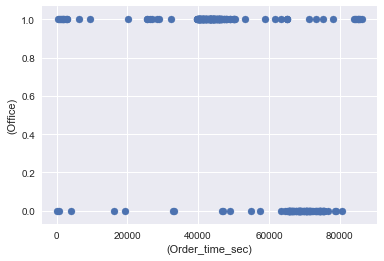

In [18]:
"""Строим график, где по оси абсцисс откладывается время поступления заказа, а по оси ординат место доставки"""

plt.scatter(df.Order_time_sec, df.Office)
plt.xlabel('(Order_time_sec)')
plt.ylabel('(Office)')
plt.show()

Судя по графику, заказы в офис и не в офис по моменту поступления пересекаются, но кажется, что не очень сильно. Точнее мы сейчас определить не сможем.

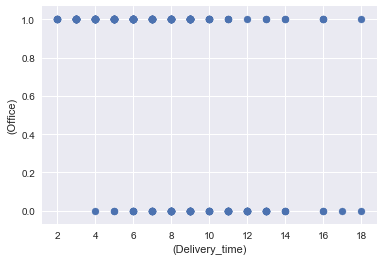

In [19]:
"""Строим график, где по оси абсцисс откладывается время доставки заказа, а по оси ординат место доставки"""

plt.scatter(df.Delivery_time, df.Office)
plt.xlabel('(Delivery_time)')
plt.ylabel('(Office)')
plt.show()

Получили график, который не дает нам никакой информации. Это получилось в следствие того, что время доставки гораздо более дискретная величина, по сравнению с моментом размещения заказа, и у нас есть заказы из обоих классов почти для всех минут доставки. Построим другой график:

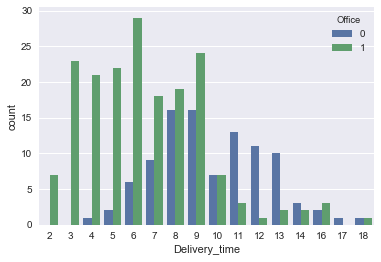

In [20]:
"""Строим диаграмму, где на каждое время доставки представлено количество доставок в офис и не в офис"""

sns.countplot(x = 'Delivery_time', hue = 'Office', data = df)
plt.show()

Из диаграммы мы видим, что в среднем в офис поставка осуществляется быстрее. Скорее всего помещение кафе располагается ближе к офисам, чем к жилым кварталам. Так же мы видим, что чем долше время доставки, тем меньше кафе получает заказов.

Попробуем построить подобный график для момента размещения заказа:

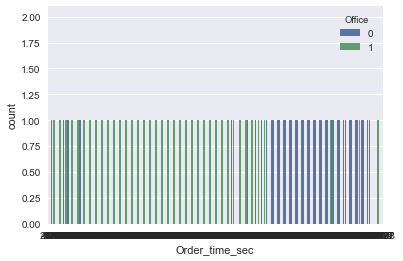

In [21]:
"""Строим диаграмму, где на каждое время размещения заказа представлено количество доставок в офис и не в офис"""

sns.countplot(x = 'Order_time_sec', hue = 'Office', data = df)
plt.show()

Опять получили лишенный смысла график. Здесь наблюдается обратная проблема. Заказы не поступают одноременно (за исключением одного случая, который следует рассматривать как случайное и крайне редкое событие). Для того, чтобы получить информативный график, нам необходимо собрать моменты поступления заказов во временные диапазоны, например, часовые. Создадим столбец Order_time_h, в который запишем час поступления заказа и построим диаграмму на полученных данных:

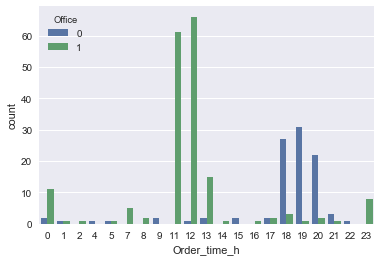

In [22]:
"""Строим диаграмму, где на каждый час времени размещения заказа представлено количество доставок 
   в офис и не в офис"""

df['Order_time_h'] = df.Order_time_sec//3600
sns.countplot(x = 'Order_time_h', hue = 'Office', data = df)
plt.show()

Вот теперь мы видим, что по моменту размещения заказа доля пересечения классов действительно не велика. Так же мы видим, что есть три больших всплеска заказов: 
- с 11 до 14 часов в офис - обеденный перерыв;
- с 18 до 22 часов на дом - для тех кто не хочет или не может готовить ужин;
- с 23 до 1 часа ночи в офис - дежурные на непрерывном производстве (например, тех. поддержка провайдеров)

Построим еще пару графиков. Постарайтесь их интерпретировать самостоятельно.

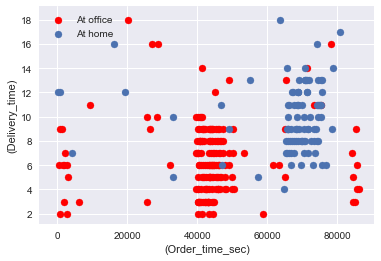

In [23]:
plt.scatter(df.Order_time_sec[df.Office == 1], df.Delivery_time[df.Office == 1], color = 'red')
plt.scatter(df.Order_time_sec[df.Office == 0], df.Delivery_time[df.Office == 0])
plt.legend(['At office', 'At home'])
plt.xlabel('(Order_time_sec)')
plt.ylabel('(Delivery_time)')
plt.show()

/goinfre/obellado/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


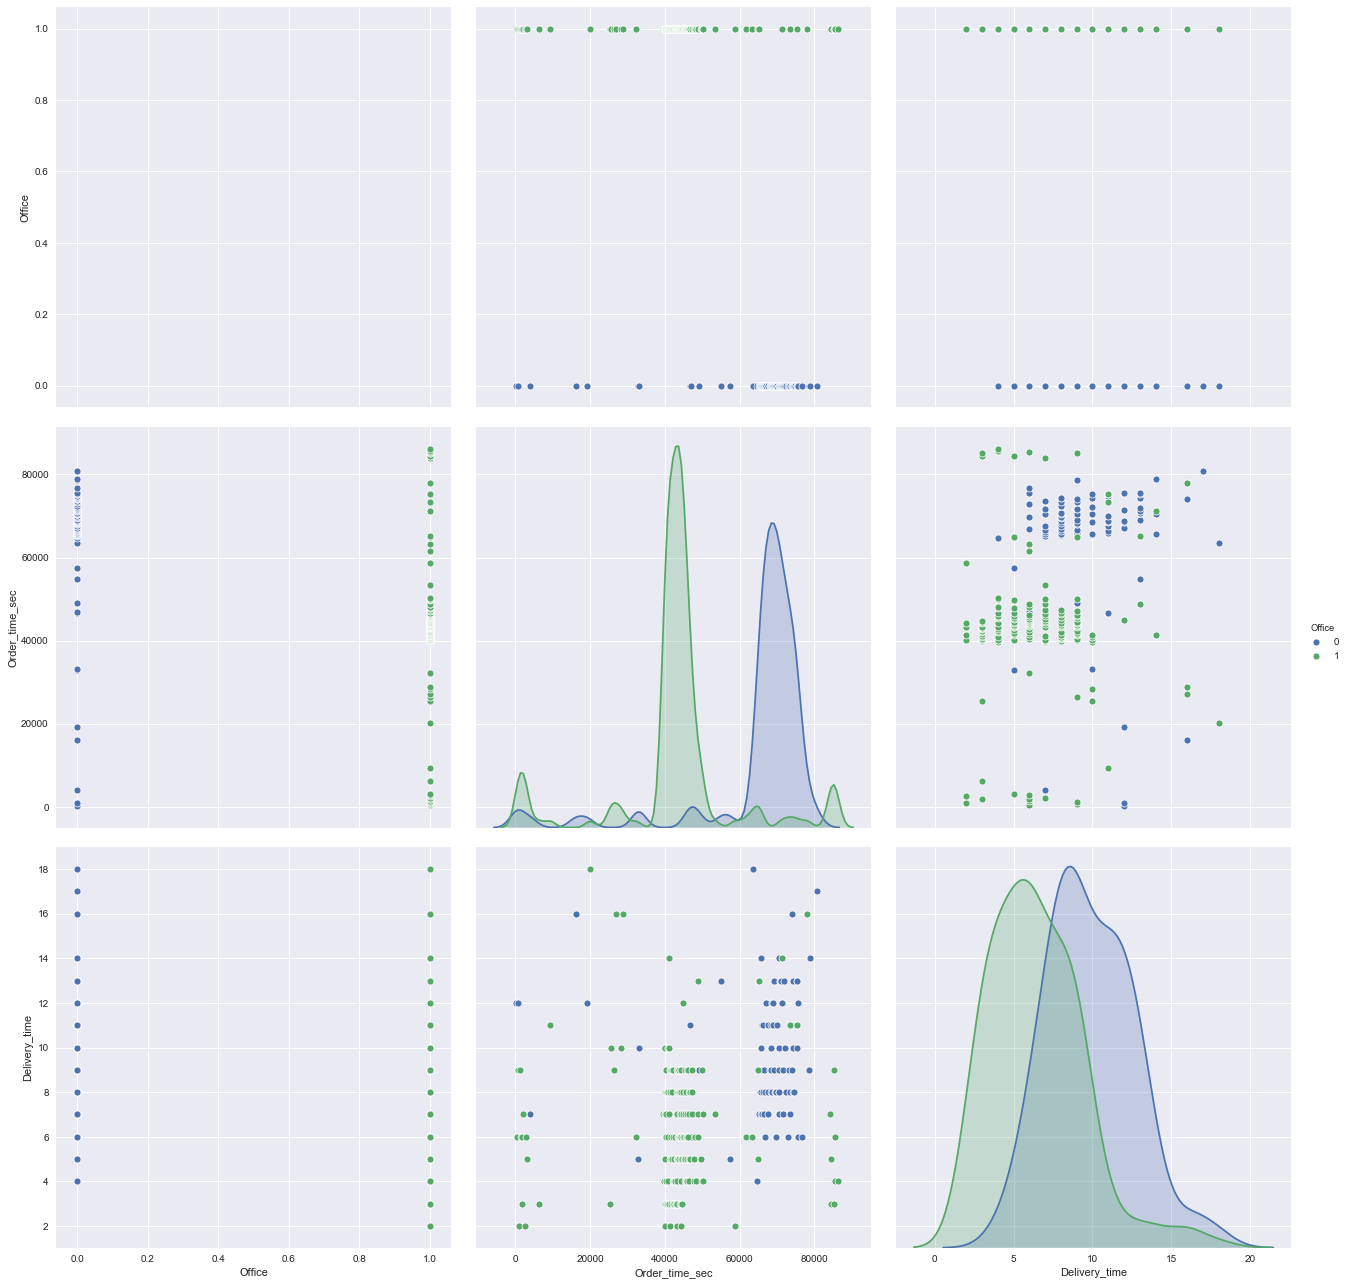

In [24]:
sns.pairplot(df[['Office', 'Order_time_sec', 'Delivery_time']], hue="Office", height=6)
plt.show()

### Разработка классификатора
***Логистическая регрессия***  
Настало время создать классификатор, который будет на основании данных о моменте размещения заказа и времени его доставки определять класс заказа (в офис, не в офис). Классификатор будем строить с помощью логистической регрессии:  
$$f(z)=\frac{1}{1+e^{-z}}$$
где *z* - это уравнение линейной регрессии по *n* признакам:
$$z=\theta_0+\sum_{i=1}^n {\theta_ix_i}$$
Поиск вектора $\bar{\theta}$ и является задачей классификации с помощью [логистической регрессии](https://habr.com/ru/company/io/blog/265007/).

***Метрики качества***  
Разработанный классификатор предсказывает к какому классу принадлежит объект на основании значений его признаков. В результате возможны четыре ситуации:
- Объект имеет характеристику класса 1 и классификатор определяет характеристику как 1. Это означает, что классификатор сработал верно. Величина ***TP*** (True positive) содержит общее количество таких ответов.
- Объект имеет характеристику класса 0, а классификатор определяет характеристику как 1. Это означает, что классификатор сработал не верно. Величина ***FP*** (False positive) содержит общее количество таких ответов.
- Объект имеет характеристику класса 0 и классификатор определяет характеристику как 0. Это означает, что классификатор сработал верно. Величина ***TN*** (True negative) содержит общее количество таких ответов.
- Объект имеет характеристику класса 1, а классификатор определяет характеристику как 0. Это означает, что классификатор сработал не верно. Величина ***FN*** (False negative) содержит общее количество таких ответов.    

Идеальный классификатор должен все определять верно, поэтому первая метрика ***Accuracy*** определяет долю правильных ответов и считается следующим образом:
$$Accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$
Однако эту метрику рекомендуется использовать только для сбалансированных классов. Простой пример: если данные содержат 50 положительных объектов и 950 отрицательных, а классификатор настроен выдавть всегда отрицательный ответ, то *Accuracy = 0.95*, т.е. 95% правильных ответов при абсолютно бесполезном классификаторе.  
Второй метрикой качества является точность - ***Precision***, которая считается следующим образом:
$$Precision=\frac{TP}{TP+FP}$$
*Precision* определяет долю положительных объектов, среди положительных ответов классификатора.  
Следующая метрика называется полнотой - ***Recall***, определяет долю выявленных классификатором положительных объектов, и рассчитывается так:
$$Recall=\frac{TP}{TP+FN}$$
На практике часто требуются хорошие значения и точности, и полноты, поэтому было разработано множество показателей на основе обеих метрик. Наиболее известная метрика - это F-мера:
$$F_\beta = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}} = \frac {(1 + \beta^2) \cdot \mathrm{TP} }{(1 + \beta^2) \cdot \mathrm{TP} + \beta^2 \cdot \mathrm{FN} + \mathrm{FP}}$$
F-мера - это среднее гармоническое точности и полноты. При плохих значениях одной из метрик (или обеих), F-мера устремляется к нулю. Параметр $\beta$ регулирует значимости метрик:
- Если $\beta>1$, то F-мера сильнее реагирует на долю ложноположительных ответов, т.е. на *Recall*;
- Если $\beta<1$, то F-мера чувствительнее к точности;
- Если $\beta=1$, то *Recall* и *Precision* равнозначны.
Часто используют именно метрику **$F_1$**:
$$F_1 = \frac{2\cdot\mathrm{precision} \cdot \mathrm{recall}}{ \mathrm{precision} + \mathrm{recall}}$$ 

Значительное отклонение метрик качества на обучающей и тестовой выборках может свидетельствовать о [переобучении модели](https://ru.wikipedia.org/wiki/Переобучение)

***scikit-learn***

Для разработки классификатора воспольземся библиотекой с инструментами машинного обучения [scikit-learn](https://scikit-learn.org/stable/) (sklearn).  
Нам потребуются 4 инструмента:
- ***classification_report*** из модуля [metrics](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics) сформирует метрики *Accuracy*, *Precision*, *Recall* и $F_1$;
- ***train_test_split*** из модуля [model_selection](https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn.model_selection#module-sklearn.model_selection) поможет разбить выборку на обучающую и тестовую;
- ***StandardScaler*** из модуля [preprocessing](https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn.preprocessing#module-sklearn.preprocessing) поможет преобразовать данные к стандартному виду;
- ***LogisticRegression*** из модуля [linear_model](https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn.linear_model#module-sklearn.linear_model) поможет подобрать параметры для логистической регрессии.

In [25]:
"""Импортируем необходимые инструменты"""

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [26]:
"""Разрабатываем классификатор"""

y = df.Office                                   # Определяем результирующий признак
X = df[['Order_time_sec', 'Delivery_time']]     # Определяем признаки

"""С помощью функции train_test_split разбиваем выборку на обучающую и тестовую. Параметр test_size указывает на 
   долю тестовой выборки. Если параметр random_state отличен от None, т.е. имеет конкретное значение, то 
   генерируемые псевдослучайные величины будут иметь одни и те же значения при каждом вызове, и мы будем каждый 
   раз получать одинаковое разбиение на обучающую и тестовую выборки. Условимся, что, если не указано другое, то
   по всему курсу обучения random_state=21"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

"""Функция StandardScaler приведет значения признаков к стандартному виду z = (x-u)/s, где u - среднее значение,
   а s - стандартное отклонение. Расчет среднего значения и стандартного отклонение осуществляется на выборке для 
   обучения, затем осуществляется преобразования данных для обучения и тестовых данных """
sc = StandardScaler()
sc.fit(X_train)                                  # Находим среднее и стандартное отклонение обучающей выборки
X_train_std = sc.transform(X_train)              # Преобразовываем обучающую выборку
X_test_std = sc.transform(X_test)                # Преобразовываем тестовую выборку

"""Формируем классификатор с помощью LogisticRegression. Коэффициенты уравнения логистической регрессии находятся
   на обучающей выборке, затем с помощью найденного уравнения предсказывается класс объекта на тестовой выборке"""
lr = LogisticRegression(random_state=21)
lr.fit(X_train_std, y_train)                     # Находим коэффициенты уравнения логистической регрессии
y_pred = lr.predict(X_test_std)                  # Определяем класс на значениях тестовых данных

print(classification_report(y_test, y_pred))     # Публикуем результаты качества модели на тестовой выборке

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        25
           1       0.93      0.84      0.88        45

   micro avg       0.86      0.86      0.86        70
   macro avg       0.84      0.86      0.85        70
weighted avg       0.87      0.86      0.86        70



/goinfre/obellado/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Для анализа полученного результата напишем функцию *Processing_results()*, которой передаются значения:
- sc - действующий (полученный при разработке классификатора) метод стандартизации данных;
- lr - классификатор;
- df - датафрейм;
- target - название столбца целевого признака;
- attribute_name - список названий столбцов признаков;
- name - строка названия анализируемого результата;
- add_schedule - список списков признаков, для которых необходимо построить дополнительные графики (необязательный параметр)

In [27]:
def Processing_results(sc, lr, df, target, attribute_name, name, add_schedule = []):
    X_std = sc.transform(df[attribute_name])
    new_col_name = []
    for i, col_name in enumerate(attribute_name):
        s = col_name + '_std_' + name
        df[s] = X_std[:,i]
        new_col_name.append(s)
    y_pred = 'y_pred_' + name
    Correct = 'Correct_' + name
    df[y_pred] = lr.predict(X_std)
    df[Correct] = df.Office == df[y_pred]
    print(classification_report(df.Office, df[y_pred]))
    sns.pairplot(df[[Correct] + new_col_name], hue = Correct, height=round(12/len(new_col_name), 1))
    plt.show()
    for k in range(len(add_schedule)):
        i,j = add_schedule[k]
        i = i+'_std_'+name
        j = j+'_std_'+name
        plt.scatter(df[i][True ^ df[Correct]], df[j][True ^ df[Correct]], color = 'red')
        plt.scatter(df[i][df[Correct]], df[j][df[Correct]])
        plt.legend(['defined not correct', 'correct defined'])
        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()
    return df

/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


              precision    recall  f1-score   support

           0       0.81      0.85      0.83        98
           1       0.92      0.90      0.91       182

   micro avg       0.88      0.88      0.88       280
   macro avg       0.86      0.87      0.87       280
weighted avg       0.88      0.88      0.88       280



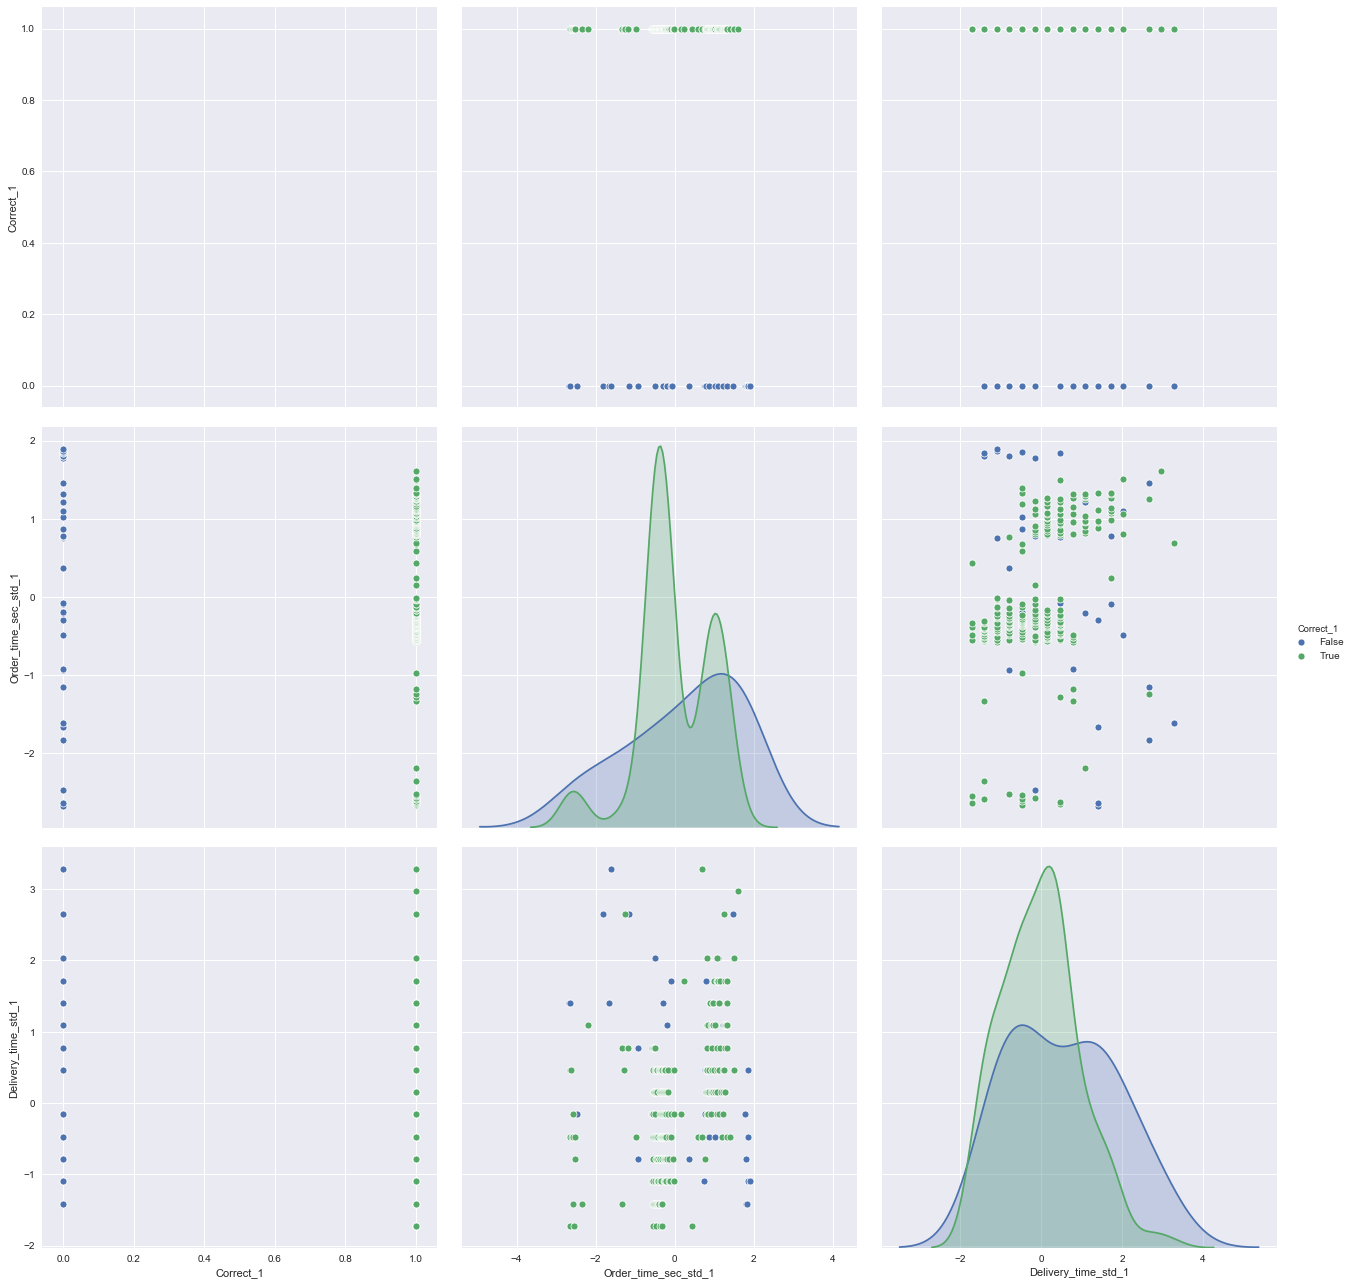

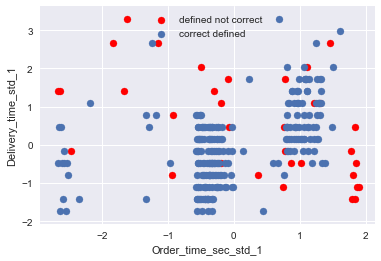

,Order_time,Delivery_time,Office,Order_time_sec,Order_time_h,Order_time_sec_std_1,Delivery_time_std_1,y_pred_1,Correct_1
0,0:03:35,12,0,215,0,-2.670995,1.403727,1,False
1,0:07:14,6,1,434,0,-2.659361,-0.473870,1,True
2,0:11:30,9,1,690,0,-2.645761,0.464929,1,True
3,0:13:48,12,0,828,0,-2.638430,1.403727,1,False
4,0:14:36,2,1,876,0,-2.635880,-1.725600,1,True
5,0:20:44,9,1,1244,0,-2.616330,0.464929,1,True
6,0:24:29,6,1,1469,0,-2.604377,-0.473870,1,True
7,0:31:13,3,1,1873,0,-2.582914,-1.412668,1,True
8,0:31:47,6,1,1907,0,-2.581108,-0.473870,1,True
9,0:34:41,7,1,2081,0,-2.571864,-0.160937,1,True


In [28]:
y = 'Office'
x = ['Order_time_sec', 'Delivery_time']
df = Processing_results(sc, lr, df, y, x, '1', [x])
df

/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.94      0.94      0.94        47

   micro avg       0.91      0.91      0.91        68
   macro avg       0.90      0.90      0.90        68
weighted avg       0.91      0.91      0.91        68



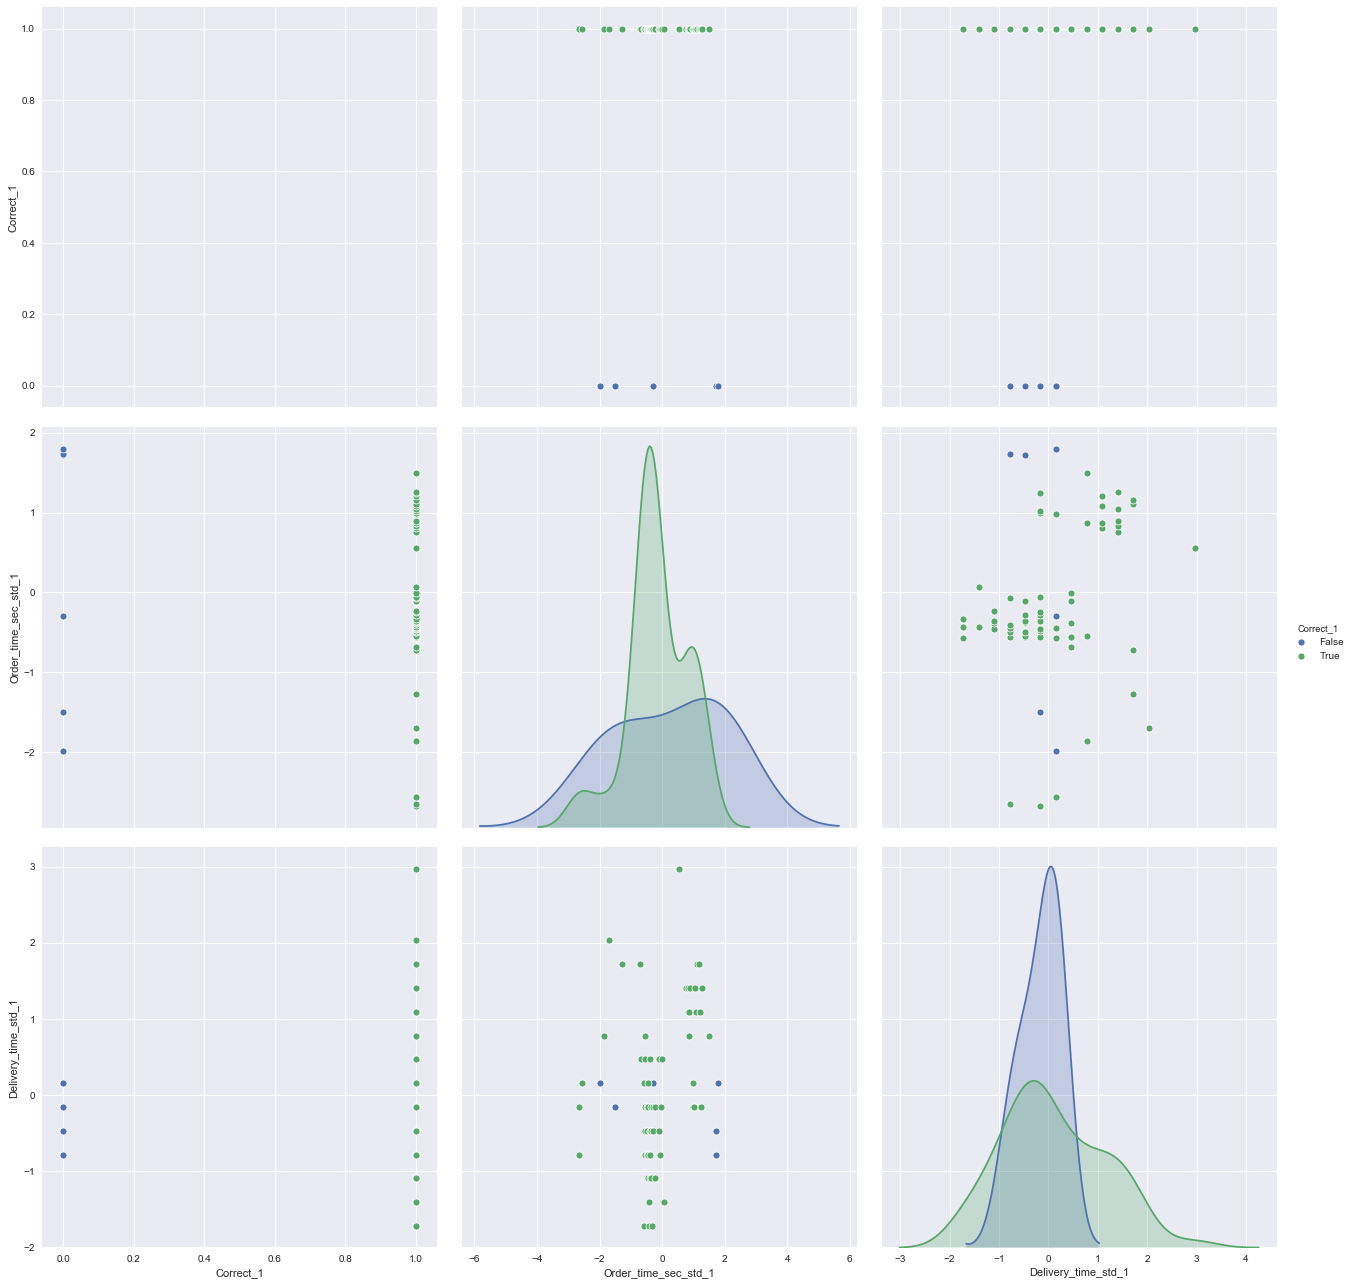

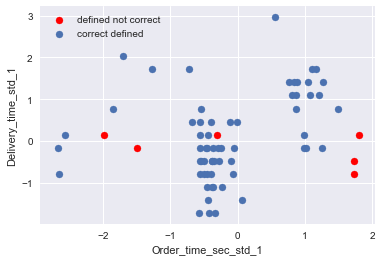

,Order_time,Delivery_time,Office,Order_time_sec,Order_time_sec_std_1,Delivery_time_std_1,y_pred_1,Correct_1
0,0:04:24,7,1,264,-2.668392,-0.160937,1,True
1,0:10:10,5,1,610,-2.650011,-0.786802,1,True
2,0:37:54,8,1,2274,-2.561611,0.151996,1,True
3,3:41:23,8,0,13283,-1.976760,0.151996,1,False
4,4:19:15,10,1,15555,-1.856060,0.777861,1,True
5,5:08:32,14,1,18512,-1.698970,2.029592,1,True
6,6:11:41,7,0,22301,-1.497680,-0.160937,1,False
7,7:22:52,13,1,26572,-1.270783,1.716659,1,True
8,10:14:59,13,1,36899,-0.722163,1.716659,1,True
9,10:27:34,9,1,37654,-0.682053,0.464929,1,True


In [30]:
df_test = pd.read_excel('iCafe_test.xlsx')
df_test['Order_time_sec'] = pd.to_timedelta(df_test.Order_time)//np.timedelta64(1,'s')

y = 'Office'
x = ['Order_time_sec', 'Delivery_time']
df_test = Processing_results(sc, lr, df_test, y, x, '1', [x])
df_test

## Задание 2

Путем двойного контроля мы убедились, что модель не переобучена и демонстрирует не плохое качество, все метрики на общей обучающей выборке 0.88, на тестовой выборке - 0.91. Можно ли улучшить полученное решение? Для ответа на этот вопрос в начале еще раз посмотрим на графики:

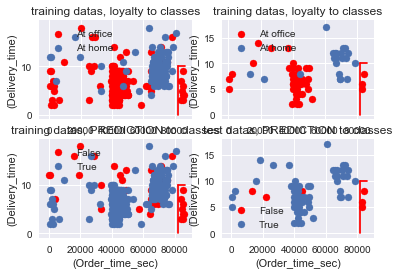

In [31]:
plt.subplot (2, 2, 1)
plt.scatter(df.Order_time_sec[df.Office == 1], df.Delivery_time[df.Office == 1], color = 'red')
plt.scatter(df.Order_time_sec[df.Office == 0], df.Delivery_time[df.Office == 0])
plt.legend(['At office', 'At home'])
plt.xlabel('(Order_time_sec)')
plt.ylabel('(Delivery_time)')
plt.plot([82000, 82000], [0,10], 'red')
plt.plot([82000, 86400], [10,10], 'red')
plt.title('training datas, loyalty to classes')
#plt.show()
plt.subplot (2, 2, 2)
plt.scatter(df_test.Order_time_sec[df_test.Office == 1], df_test.Delivery_time[df_test.Office == 1], color = 'red')
plt.scatter(df_test.Order_time_sec[df_test.Office == 0], df_test.Delivery_time[df_test.Office == 0])
plt.legend(['At office', 'At home'])
plt.xlabel('(Order_time_sec)')
plt.ylabel('(Delivery_time)')
plt.plot([82000, 82000], [0,10], 'red')
plt.plot([82000, 86400], [10,10], 'red')
plt.title('training datas, loyalty to classes')
#plt.show()
plt.subplot (2, 2, 3)
plt.scatter(df.Order_time_sec[True^df.Correct_1], df.Delivery_time[True^df.Correct_1], color = 'red')
plt.scatter(df.Order_time_sec[df.Correct_1], df.Delivery_time[df.Correct_1])
plt.legend(['False', 'True'])
plt.xlabel('(Order_time_sec)')
plt.ylabel('(Delivery_time)')
plt.plot([82000, 82000], [0,10], 'red')
plt.plot([82000, 86400], [10,10], 'red')
plt.title('training datas, PREDICTION to classes')
plt.subplot (2, 2, 4)
plt.scatter(df_test.Order_time_sec[True^df_test.Correct_1], df_test.Delivery_time[True^df_test.Correct_1], 
            color = 'red')
plt.scatter(df_test.Order_time_sec[df_test.Correct_1], df_test.Delivery_time[df_test.Correct_1])
plt.legend(['False', 'True'])
plt.xlabel('(Order_time_sec)')
plt.ylabel('(Delivery_time)')
plt.plot([82000, 82000], [0,10], 'red')
plt.plot([82000, 86400], [10,10], 'red')
plt.title('test datas, PREDICTION to classes')
plt.show()

На графиках мы видим одну и ту же область, где представители одного класса предсказываются неверно как на обучающей, так и на тестовой выборке. Попробуем "исправить" это!

1. Вам необходимо написать функцию time_change(df), которая записывает в датафрейм df столбец Order_time_sec_delta и возвращает полученный датафрейм. Столбец Order_time_sec_delta отличается от столбца Order_time_sec тем, что заказом на последней секунде суток является последний заказ "на дом" (Office = 0), все остальные заказы получают такое же смещение во времени.
2. Вам необходимо написать функцию log_reg(y, X), которая принимает на вход целевой признак y и столбцы датафрейма X, представляющие собой признаки. Функция возвращает обученные объекты sc и lr

In [77]:
"""Выполнение задания 2"""

def time_change(df):
    delta = 86400 - df.Order_time_sec[df.Office == 1].max() - 1
    df['Order_time_sec_delta'] = (df.Order_time_sec + delta) % 86400
    return df

def log_reg(y,X):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)
    sc = StandardScaler()
    sc.fit(X_train)                                  # Находим среднее и стандартное отклонение обучающей выборки
    X_train_std = sc.transform(X_train)              # Преобразовываем обучающую выборку
    X_test_std = sc.transform(X_test)                # Преобразовываем тестовую выборку

    """Формируем классификатор с помощью LogisticRegression. Коэффициенты уравнения логистической регрессии находятся
       на обучающей выборке, затем с помощью найденного уравнения предсказывается класс объекта на тестовой выборке"""
    lr = LogisticRegression(random_state=21)
    lr.fit(X_train_std, y_train)                     # Находим коэффициенты уравнения логистической регрессии
    y_pred = lr.predict(X_test_std)                  # Определяем класс на значениях тестовых данных
    return sc, lr

/goinfre/obellado/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


              precision    recall  f1-score   support

           0       0.81      0.85      0.83        98
           1       0.92      0.90      0.91       182

   micro avg       0.88      0.88      0.88       280
   macro avg       0.86      0.87      0.87       280
weighted avg       0.88      0.88      0.88       280



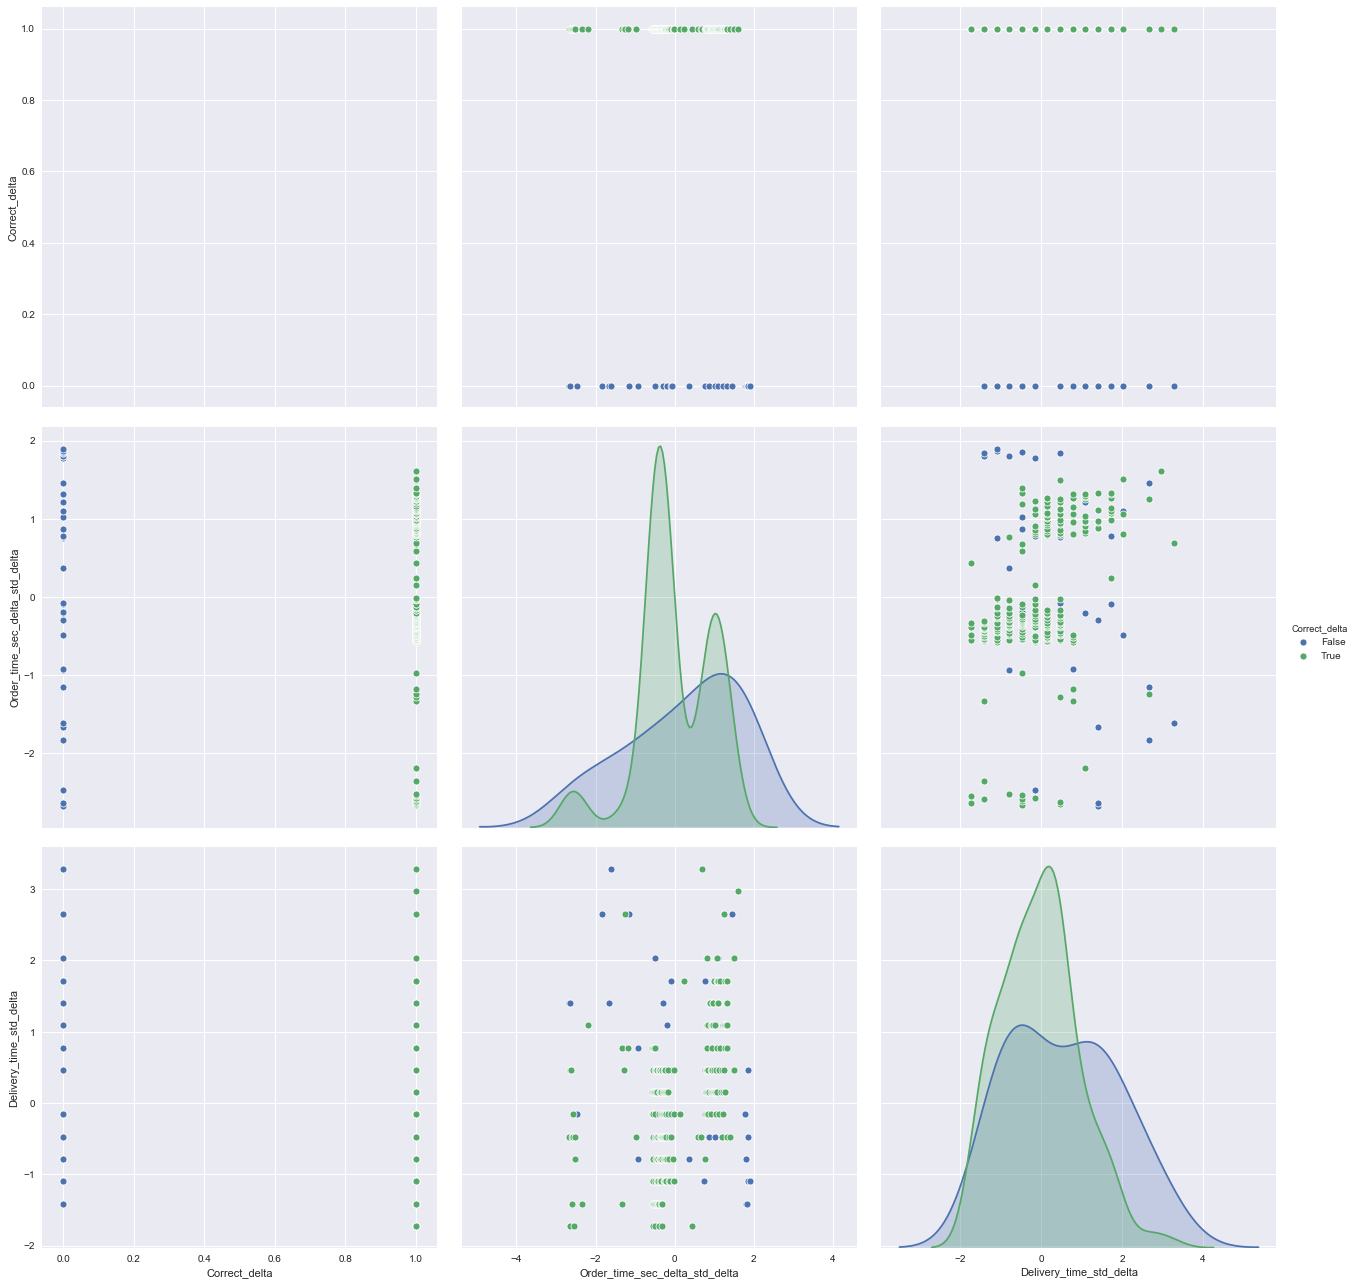

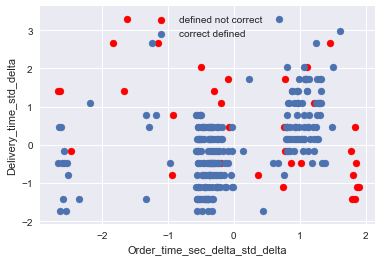

,Order_time,Delivery_time,Office,Order_time_sec,Order_time_h,Order_time_sec_std_1,Delivery_time_std_1,y_pred_1,Correct_1,Order_time_sec_delta,...,Delivery_time_std_2,y_pred_2,Correct_2,Order_sin_delta,Order_cos_delta,Order_sin_std_3,Order_cos_std_3,Delivery_time_std_3,y_pred_3,Correct_3
0,0:03:35,12,0,215,0,-2.670995,1.403727,1,False,436,...,1.403727,0,True,0.031702,0.999497,0.610442,1.784518,1.403727,0,True
1,0:07:14,6,1,434,0,-2.659361,-0.473870,1,True,655,...,-0.473870,1,True,0.047615,0.998866,0.642000,1.784013,-0.473870,1,True
2,0:11:30,9,1,690,0,-2.645761,0.464929,1,True,911,...,0.464929,1,True,0.066201,0.997806,0.678870,1.782990,0.464929,0,False
3,0:13:48,12,0,828,0,-2.638430,1.403727,1,False,1049,...,1.403727,0,True,0.076211,0.997092,0.698731,1.782245,1.403727,0,True
4,0:14:36,2,1,876,0,-2.635880,-1.725600,1,True,1097,...,-1.725600,1,True,0.079691,0.996820,0.705637,1.781954,-1.725600,1,True
5,0:20:44,9,1,1244,0,-2.616330,0.464929,1,True,1465,...,0.464929,1,True,0.106336,0.994330,0.758523,1.779183,0.464929,1,True
6,0:24:29,6,1,1469,0,-2.604377,-0.473870,1,True,1690,...,-0.473870,1,True,0.122591,0.992457,0.790797,1.777016,-0.473870,1,True
7,0:31:13,3,1,1873,0,-2.582914,-1.412668,1,True,2094,...,-1.412668,1,True,0.151692,0.988428,0.848600,1.772227,-1.412668,1,True
8,0:31:47,6,1,1907,0,-2.581108,-0.473870,1,True,2128,...,-0.473870,1,True,0.154136,0.988050,0.853454,1.771772,-0.473870,1,True
9,0:34:41,7,1,2081,0,-2.571864,-0.160937,1,True,2302,...,-0.160937,1,True,0.166625,0.986020,0.878272,1.769313,-0.160937,1,True


In [78]:
"""Запустите, после написания функций"""

df = time_change(df)
y = 'Office'
x = ['Order_time_sec_delta', 'Delivery_time']
sc_delta, lr_delta = log_reg(df[y], df[x])
df = Processing_results(sc_delta, lr_delta, df, y, x, 'delta', [x])
df

/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.94      0.94      0.94        47

   micro avg       0.91      0.91      0.91        68
   macro avg       0.90      0.90      0.90        68
weighted avg       0.91      0.91      0.91        68



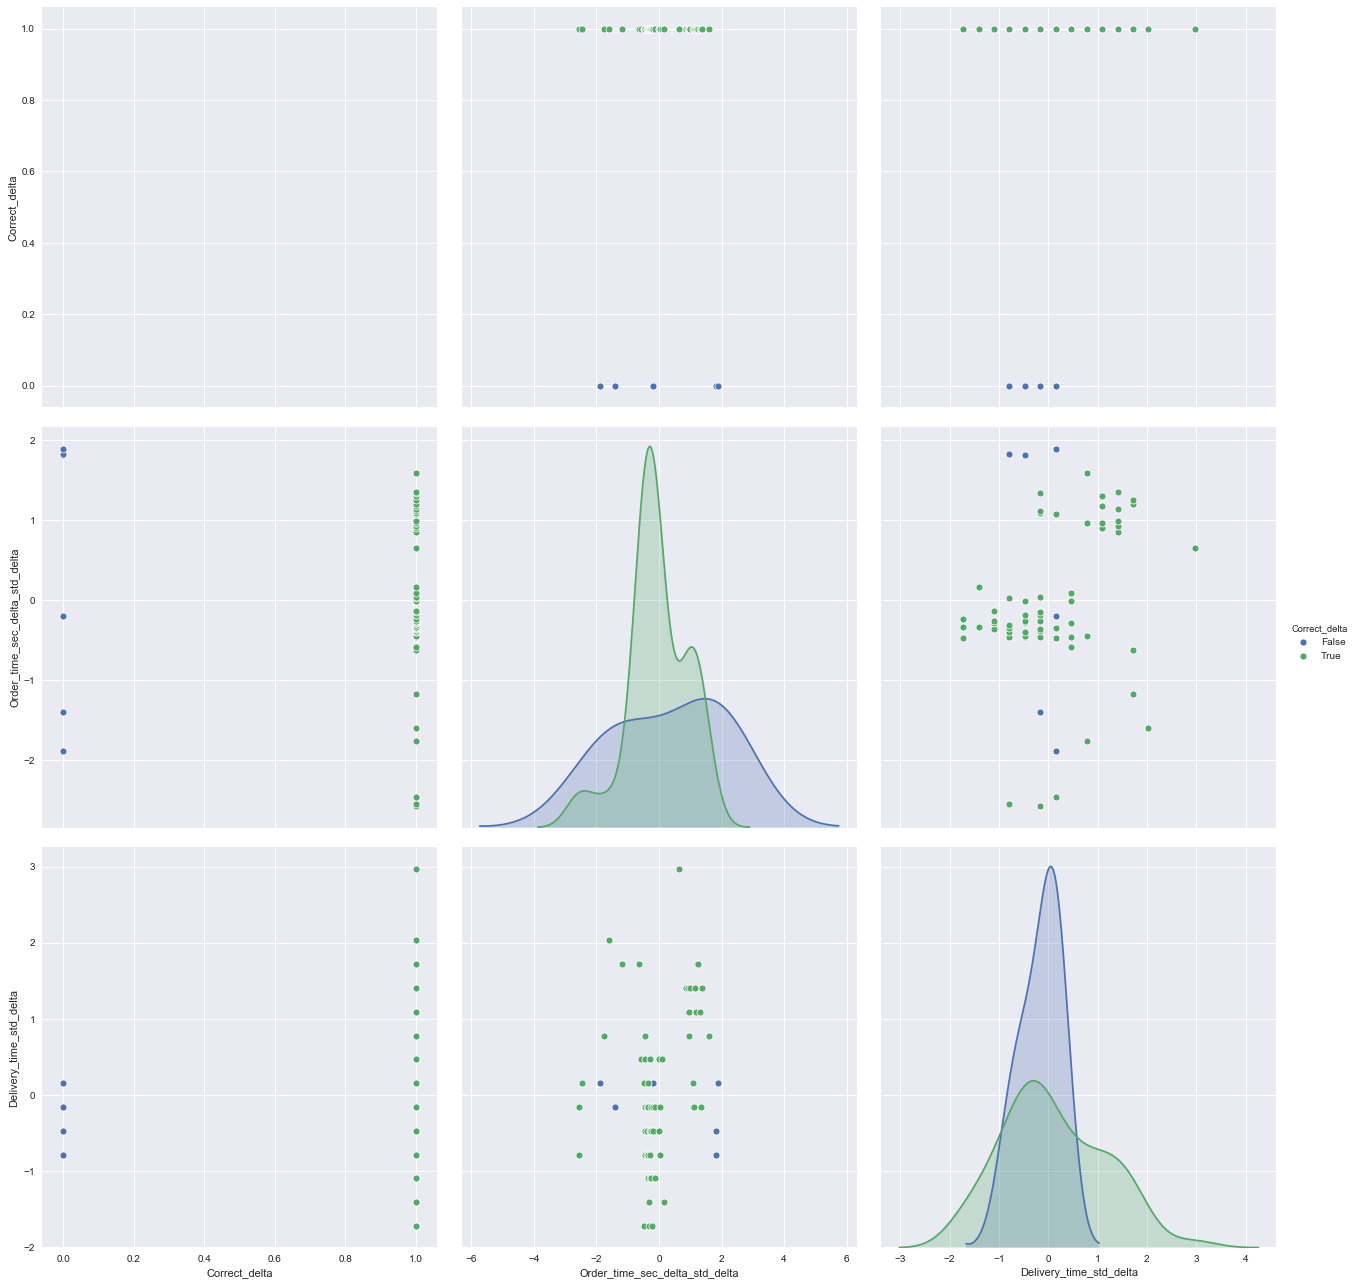

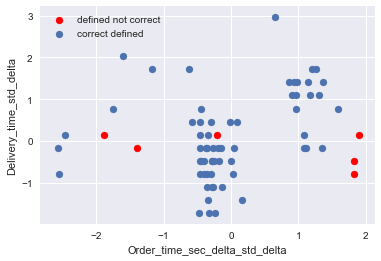

,Order_time,Delivery_time,Office,Order_time_sec,Order_time_sec_std_1,Delivery_time_std_1,y_pred_1,Correct_1,Order_time_sec_delta,Order_time_sec_delta_std_delta,Delivery_time_std_delta,y_pred_delta,Correct_delta,Order_sin,Order_cos,Order_sin_std_2,Order_cos_std_2,Delivery_time_std_2,y_pred_2,Correct_2
0,0:04:24,7,1,264,-2.668392,-0.160937,1,True,2345,-2.569580,-0.160937,1,True,0.019197,0.999816,0.600451,1.799814,-0.160937,1,True
1,0:10:10,5,1,610,-2.650011,-0.786802,1,True,2691,-2.551199,-0.786802,1,True,0.044346,0.999016,0.649760,1.798734,-0.786802,1,True
2,0:37:54,8,1,2274,-2.561611,0.151996,1,True,4355,-2.462799,0.151996,1,True,0.164617,0.986358,0.885577,1.781624,0.151996,1,True
3,3:41:23,8,0,13283,-1.976760,0.151996,1,False,15364,-1.877947,0.151996,1,False,0.822599,0.568622,2.175690,1.217011,0.151996,1,False
4,4:19:15,10,1,15555,-1.856060,0.777861,1,True,17636,-1.757248,0.777861,1,True,0.904920,0.425582,2.337098,1.023678,0.777861,1,True
5,5:08:32,14,1,18512,-1.698970,2.029592,1,True,20593,-1.600157,2.029592,1,True,0.974891,0.222683,2.474291,0.749439,2.029592,1,True
6,6:11:41,7,0,22301,-1.497680,-0.160937,1,False,24382,-1.398867,-0.160937,1,False,0.998701,-0.050956,2.520975,0.379588,-0.160937,1,False
7,7:22:52,13,1,26572,-1.270783,1.716659,1,True,28653,-1.171971,1.716659,1,True,0.935341,-0.353747,2.396745,-0.029665,1.716659,1,True
8,10:14:59,13,1,36899,-0.722163,1.716659,1,True,38980,-0.623350,1.716659,1,True,0.442354,-0.896841,1.430139,-0.763712,1.716659,1,True
9,10:27:34,9,1,37654,-0.682053,0.464929,1,True,39735,-0.583241,0.464929,1,True,0.392471,-0.919764,1.332333,-0.794696,0.464929,1,True


In [79]:
"""Запустите, если сработала предыдущая ячейка"""

df_test = time_change(df_test)
y = 'Office'
x = ['Order_time_sec_delta', 'Delivery_time']
df_test = Processing_results(sc_delta, lr_delta, df_test, y, x, 'delta', [x])
df_test

Мы улучшили качество классификатора за счет обеспечения монотонности целевой переменной от признаков, т.е. теперь выполняютя правила:
- чем больше момент времени поступления заказа, тем выше вероятность доставки на дом;
- чем выше время доставки, тем выше вероятность вероятность доставки на дом.

К сожалению, не всегда есть возможность обеспечить монотонность целевой переменной от признаков без применения каких-нибудь дополнительных инструментов.

Можно ли улучшить качество классификатора еще каким-нибудь способом? Это не только возможно, но и необходимо. 

Одним из способов улучшения классификатора является увеличение порядка пространства признаков, например, если на плоскости достаточно тяжело провести линию, разделяющую классы, то в трехмерном пространстве уже можно найти плоскость, которая сделает это лучше.

Все моменты времени необходимо преобразовывать через синус и косинус, формируя тем самым вместо одного два признака. Это становится тем более важным, если у нас вместо одного временного периода имеется несколько и существует возможность периодических колебаний.

Преобразования производятся по следующим формулам:
$$z_{sin} = sin\left(\frac{2\cdot\mathrm{\pi} \cdot \mathrm{x}}{ \mathrm{K} }\right)$$ 
$$z_{cos} = cos\left(\frac{2\cdot\mathrm{\pi} \cdot \mathrm{x}}{ \mathrm{K} }\right)$$ 

Здесь х - это значение момента времени, а К - значение временного периода в единицах измерения моментов времени.
Например: 
- если моменты времени измеряются в секундах, а временной период равен суткам, то К=86400;
- если моменты времени измеряются в днях, а временной период равен неделе, то К=7.

Проведем преобразование времени поступления заказа:

In [80]:
df['Order_sin'] = np.sin(df.Order_time_sec*math.pi/43200)
df['Order_cos'] = np.cos(df.Order_time_sec*math.pi/43200)
df

,Order_time,Delivery_time,Office,Order_time_sec,Order_time_h,Order_time_sec_std_1,Delivery_time_std_1,y_pred_1,Correct_1,Order_time_sec_delta,...,Delivery_time_std_2,y_pred_2,Correct_2,Order_sin_delta,Order_cos_delta,Order_sin_std_3,Order_cos_std_3,Delivery_time_std_3,y_pred_3,Correct_3
0,0:03:35,12,0,215,0,-2.670995,1.403727,1,False,436,...,1.403727,0,True,0.031702,0.999497,0.610442,1.784518,1.403727,0,True
1,0:07:14,6,1,434,0,-2.659361,-0.473870,1,True,655,...,-0.473870,1,True,0.047615,0.998866,0.642000,1.784013,-0.473870,1,True
2,0:11:30,9,1,690,0,-2.645761,0.464929,1,True,911,...,0.464929,1,True,0.066201,0.997806,0.678870,1.782990,0.464929,0,False
3,0:13:48,12,0,828,0,-2.638430,1.403727,1,False,1049,...,1.403727,0,True,0.076211,0.997092,0.698731,1.782245,1.403727,0,True
4,0:14:36,2,1,876,0,-2.635880,-1.725600,1,True,1097,...,-1.725600,1,True,0.079691,0.996820,0.705637,1.781954,-1.725600,1,True
5,0:20:44,9,1,1244,0,-2.616330,0.464929,1,True,1465,...,0.464929,1,True,0.106336,0.994330,0.758523,1.779183,0.464929,1,True
6,0:24:29,6,1,1469,0,-2.604377,-0.473870,1,True,1690,...,-0.473870,1,True,0.122591,0.992457,0.790797,1.777016,-0.473870,1,True
7,0:31:13,3,1,1873,0,-2.582914,-1.412668,1,True,2094,...,-1.412668,1,True,0.151692,0.988428,0.848600,1.772227,-1.412668,1,True
8,0:31:47,6,1,1907,0,-2.581108,-0.473870,1,True,2128,...,-0.473870,1,True,0.154136,0.988050,0.853454,1.771772,-0.473870,1,True
9,0:34:41,7,1,2081,0,-2.571864,-0.160937,1,True,2302,...,-0.160937,1,True,0.166625,0.986020,0.878272,1.769313,-0.160937,1,True


Построим графики целевого показателя в пространстве полученных признаков:

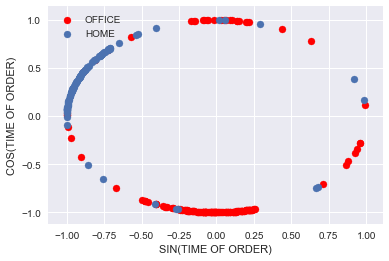

In [81]:
plt.scatter(df.Order_sin[df.Office == 1], df.Order_cos[df.Office == 1], color = 'red')
plt.scatter(df.Order_sin[df.Office == 0], df.Order_cos[df.Office == 0])
plt.legend(['OFFICE', 'HOME'])
plt.xlabel('SIN(TIME OF ORDER)')
plt.ylabel('COS(TIME OF ORDER)')
plt.show()

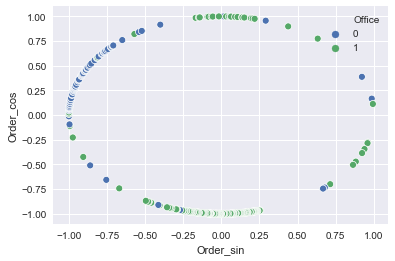

In [82]:
sns.scatterplot(x = 'Order_sin', y = 'Order_cos', data = df, hue = 'Office')
plt.show()

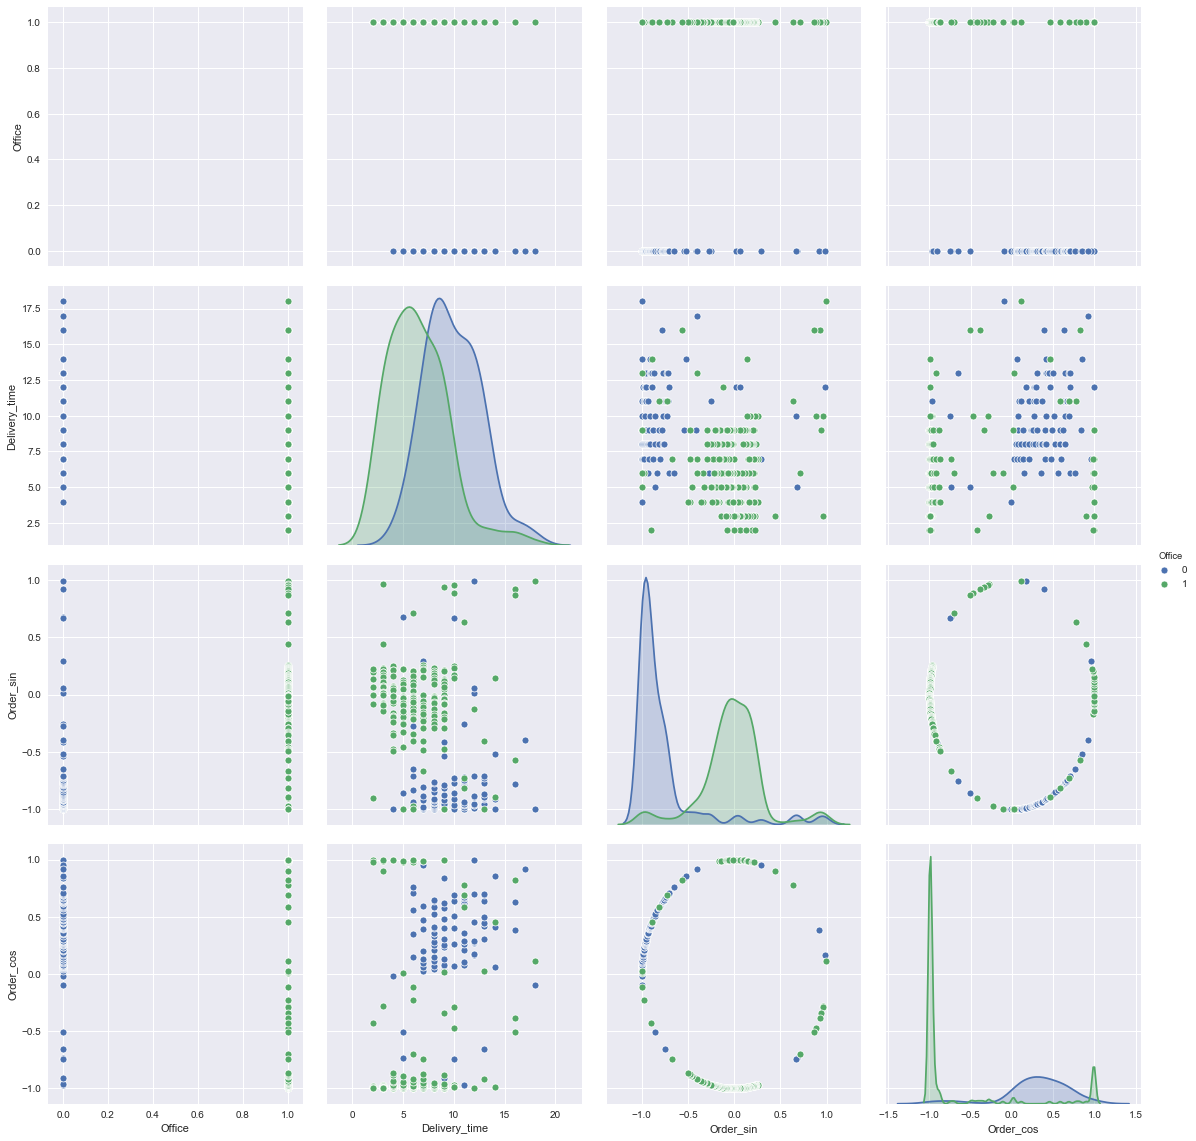

In [83]:
sns.pairplot(df[['Office', 'Delivery_time', 'Order_sin', 'Order_cos']], hue="Office", height=4)
plt.show()

Построим классификатор на преобразованых данных

/goinfre/obellado/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.96      0.96      0.96        45

   micro avg       0.94      0.94      0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        98
           1       0.95      0.94      0.94       182

   micro avg       0.93      0.93      0.93       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.93      0.93      0.93       280



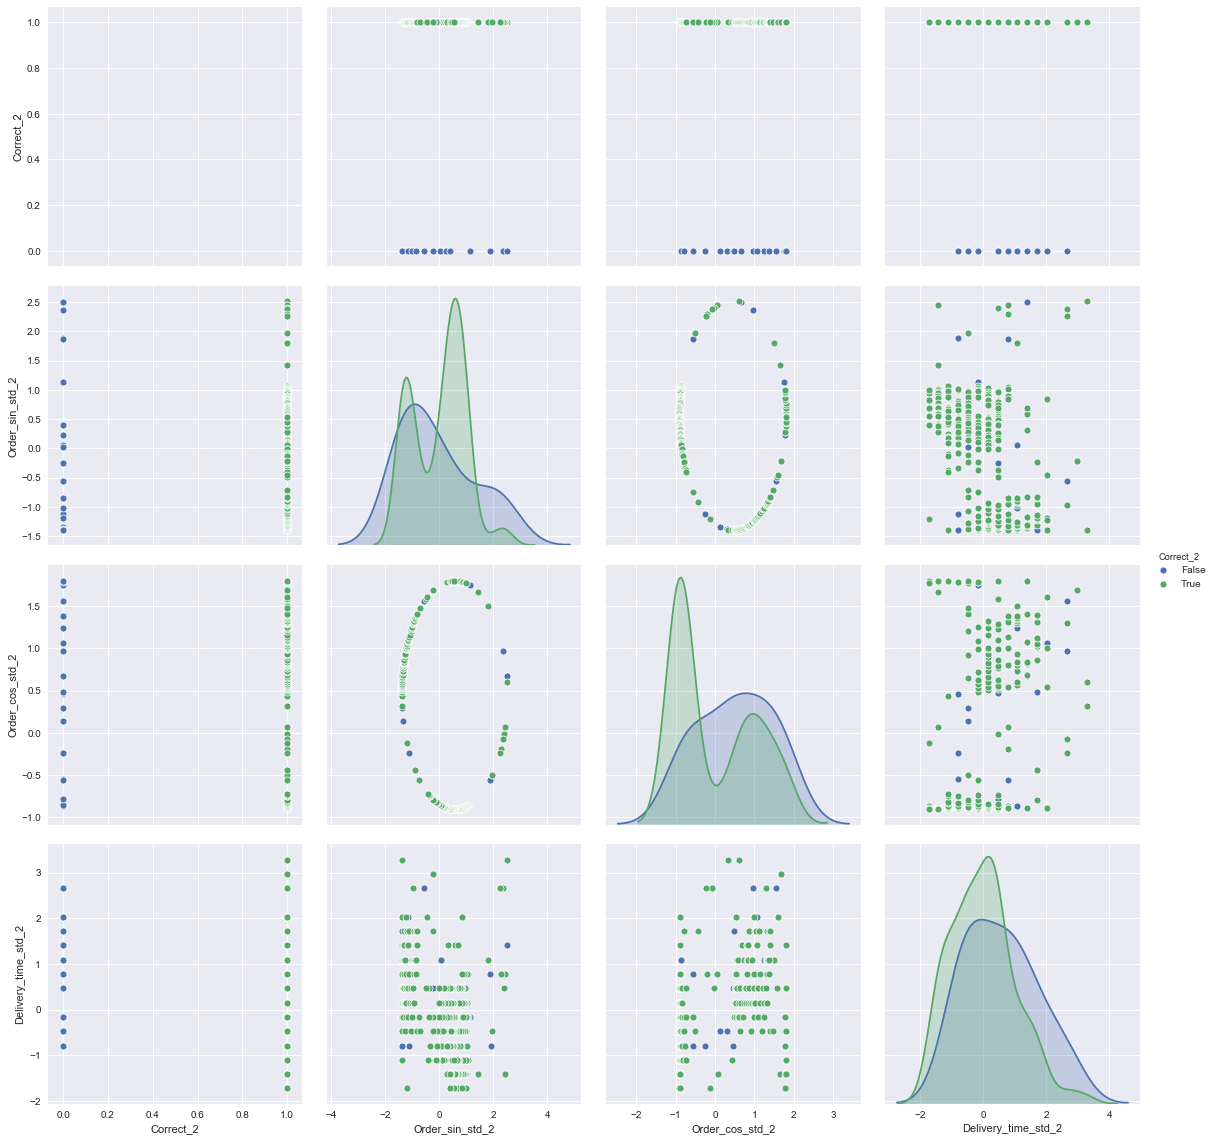

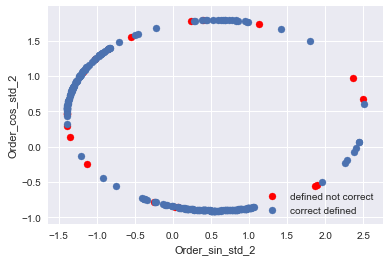

,Order_time,Delivery_time,Office,Order_time_sec,Order_time_h,Order_time_sec_std_1,Delivery_time_std_1,y_pred_1,Correct_1,Order_time_sec_delta,...,Delivery_time_std_2,y_pred_2,Correct_2,Order_sin_delta,Order_cos_delta,Order_sin_std_3,Order_cos_std_3,Delivery_time_std_3,y_pred_3,Correct_3
0,0:03:35,12,0,215,0,-2.670995,1.403727,1,False,436,...,1.403727,0,True,0.031702,0.999497,0.610442,1.784518,1.403727,0,True
1,0:07:14,6,1,434,0,-2.659361,-0.473870,1,True,655,...,-0.473870,1,True,0.047615,0.998866,0.642000,1.784013,-0.473870,1,True
2,0:11:30,9,1,690,0,-2.645761,0.464929,1,True,911,...,0.464929,1,True,0.066201,0.997806,0.678870,1.782990,0.464929,0,False
3,0:13:48,12,0,828,0,-2.638430,1.403727,1,False,1049,...,1.403727,0,True,0.076211,0.997092,0.698731,1.782245,1.403727,0,True
4,0:14:36,2,1,876,0,-2.635880,-1.725600,1,True,1097,...,-1.725600,1,True,0.079691,0.996820,0.705637,1.781954,-1.725600,1,True
5,0:20:44,9,1,1244,0,-2.616330,0.464929,1,True,1465,...,0.464929,1,True,0.106336,0.994330,0.758523,1.779183,0.464929,1,True
6,0:24:29,6,1,1469,0,-2.604377,-0.473870,1,True,1690,...,-0.473870,1,True,0.122591,0.992457,0.790797,1.777016,-0.473870,1,True
7,0:31:13,3,1,1873,0,-2.582914,-1.412668,1,True,2094,...,-1.412668,1,True,0.151692,0.988428,0.848600,1.772227,-1.412668,1,True
8,0:31:47,6,1,1907,0,-2.581108,-0.473870,1,True,2128,...,-0.473870,1,True,0.154136,0.988050,0.853454,1.771772,-0.473870,1,True
9,0:34:41,7,1,2081,0,-2.571864,-0.160937,1,True,2302,...,-0.160937,1,True,0.166625,0.986020,0.878272,1.769313,-0.160937,1,True


In [84]:
y = df.Office
X = df[['Order_sin', 'Order_cos', 'Delivery_time']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

sc_2 = StandardScaler()
sc_2.fit(X_train)
X_train_std = sc_2.transform(X_train)
X_test_std = sc_2.transform(X_test)

lr_2 = LogisticRegression(random_state=21)
lr_2.fit(X_train_std, y_train)

y_pred_2 = lr_2.predict(X_test_std)

print(classification_report(y_test, y_pred_2))

y = 'Office'
X = ['Order_sin', 'Order_cos', 'Delivery_time']
x = ['Order_sin', 'Order_cos']
df = Processing_results(sc_2, lr_2, df, y, X, '2', [x])
df

/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.94      0.98      0.96        47

   micro avg       0.94      0.94      0.94        68
   macro avg       0.94      0.92      0.93        68
weighted avg       0.94      0.94      0.94        68



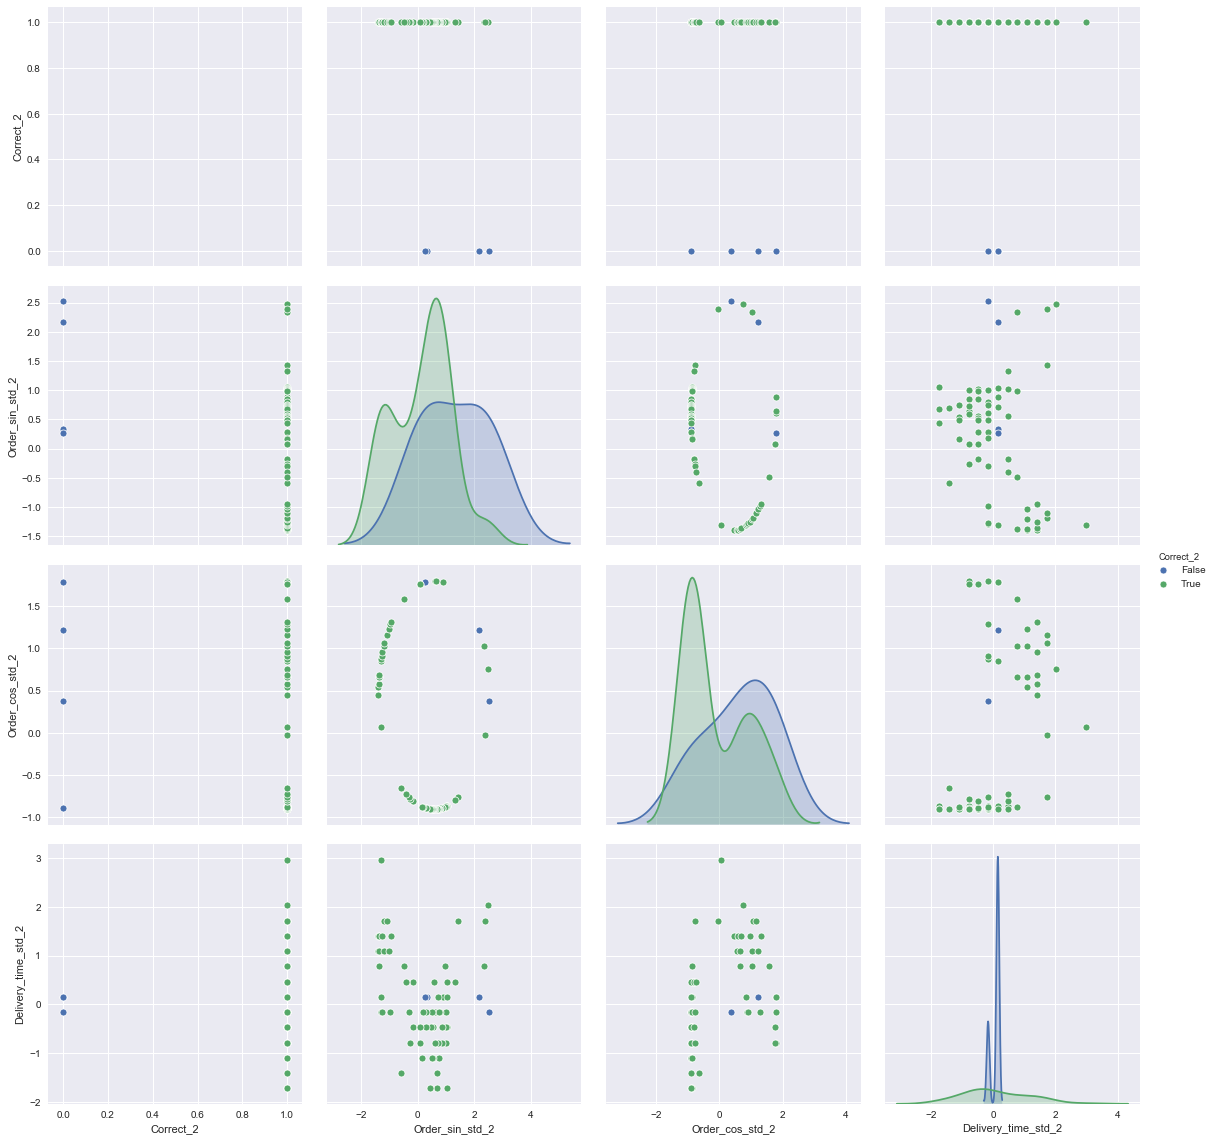

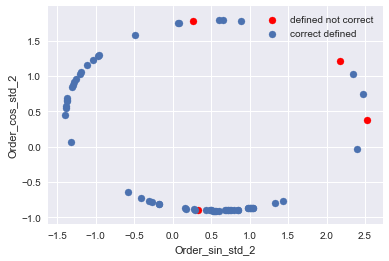

,Order_time,Delivery_time,Office,Order_time_sec,Order_time_sec_std_1,Delivery_time_std_1,y_pred_1,Correct_1,Order_time_sec_delta,Order_time_sec_delta_std_delta,Delivery_time_std_delta,y_pred_delta,Correct_delta,Order_sin,Order_cos,Order_sin_std_2,Order_cos_std_2,Delivery_time_std_2,y_pred_2,Correct_2
0,0:04:24,7,1,264,-2.668392,-0.160937,1,True,2345,-2.569580,-0.160937,1,True,0.019197,0.999816,0.600451,1.799814,-0.160937,1,True
1,0:10:10,5,1,610,-2.650011,-0.786802,1,True,2691,-2.551199,-0.786802,1,True,0.044346,0.999016,0.649760,1.798734,-0.786802,1,True
2,0:37:54,8,1,2274,-2.561611,0.151996,1,True,4355,-2.462799,0.151996,1,True,0.164617,0.986358,0.885577,1.781624,0.151996,1,True
3,3:41:23,8,0,13283,-1.976760,0.151996,1,False,15364,-1.877947,0.151996,1,False,0.822599,0.568622,2.175690,1.217011,0.151996,1,False
4,4:19:15,10,1,15555,-1.856060,0.777861,1,True,17636,-1.757248,0.777861,1,True,0.904920,0.425582,2.337098,1.023678,0.777861,1,True
5,5:08:32,14,1,18512,-1.698970,2.029592,1,True,20593,-1.600157,2.029592,1,True,0.974891,0.222683,2.474291,0.749439,2.029592,1,True
6,6:11:41,7,0,22301,-1.497680,-0.160937,1,False,24382,-1.398867,-0.160937,1,False,0.998701,-0.050956,2.520975,0.379588,-0.160937,1,False
7,7:22:52,13,1,26572,-1.270783,1.716659,1,True,28653,-1.171971,1.716659,1,True,0.935341,-0.353747,2.396745,-0.029665,1.716659,1,True
8,10:14:59,13,1,36899,-0.722163,1.716659,1,True,38980,-0.623350,1.716659,1,True,0.442354,-0.896841,1.430139,-0.763712,1.716659,1,True
9,10:27:34,9,1,37654,-0.682053,0.464929,1,True,39735,-0.583241,0.464929,1,True,0.392471,-0.919764,1.332333,-0.794696,0.464929,1,True


In [85]:
df_test['Order_sin'] = np.sin(df_test.Order_time_sec*math.pi/43200)
df_test['Order_cos'] = np.cos(df_test.Order_time_sec*math.pi/43200)

y = 'Office'
X = ['Order_sin', 'Order_cos', 'Delivery_time']
x = ['Order_sin', 'Order_cos']
df_test = Processing_results(sc_2, lr_2, df_test, y, X, '2', [x])
df_test

На общей выборке метрики показывают такой же результат, как и в задании 2, на тестовой выборе результат немного хуже.

## Задание 3

Возьмите данные со смещенным временем из задания 2. Произведите преобразование через синус и косинус. Постройте классификатор. Сравните результаты.

/goinfre/obellado/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/goinfre/obellado/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.96      0.96      0.96        45

   micro avg       0.94      0.94      0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        98
           1       0.95      0.94      0.94       182

   micro avg       0.93      0.93      0.93       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.93      0.93      0.93       280



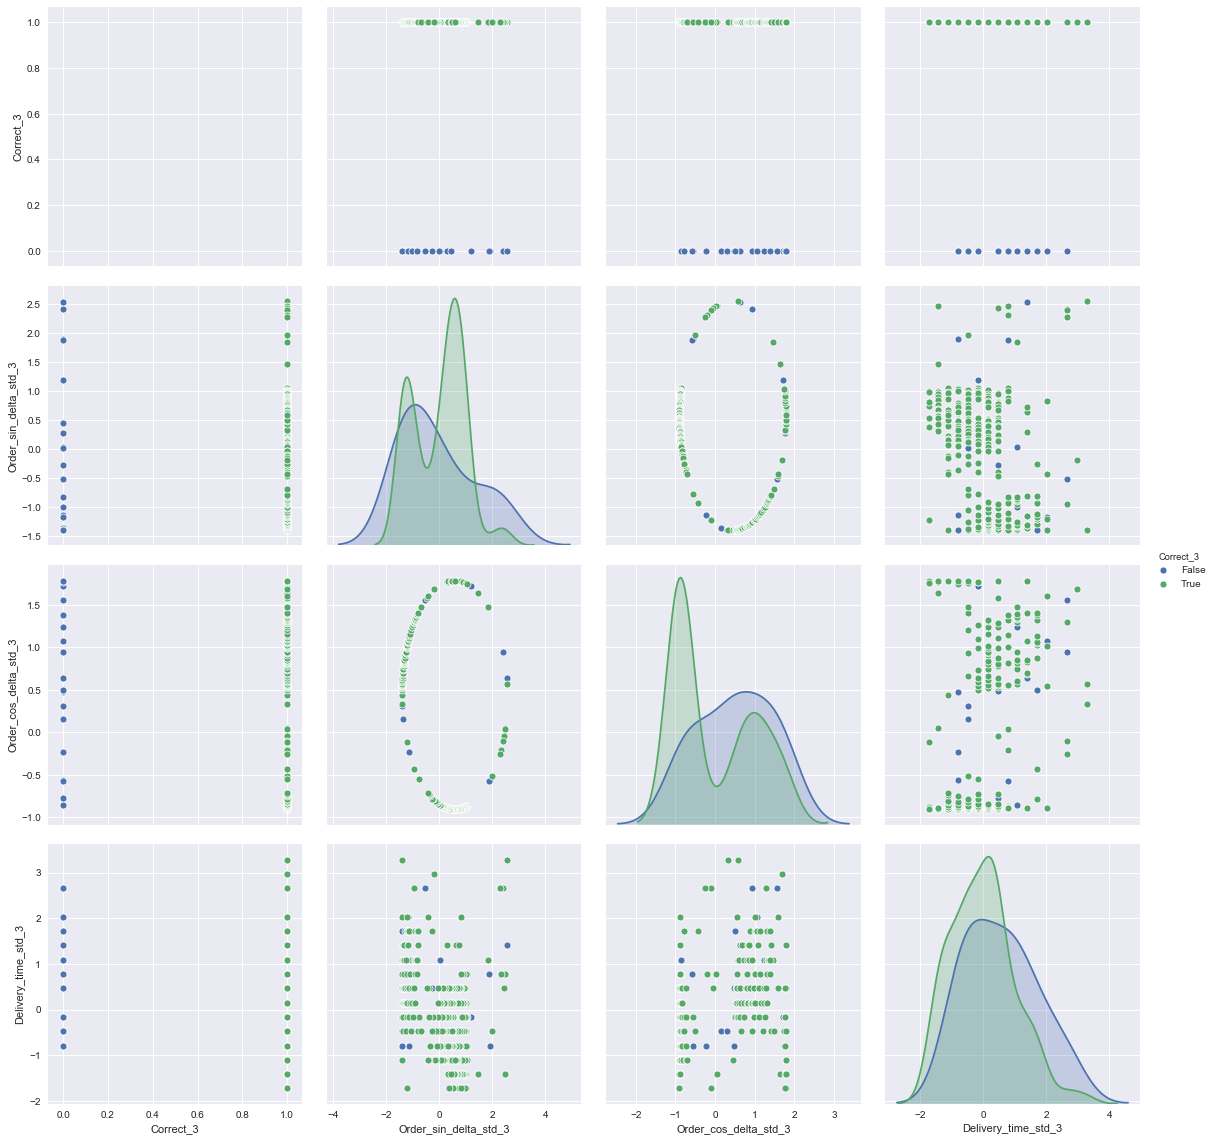

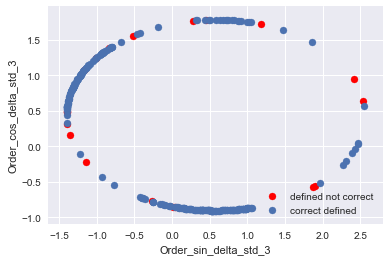

,Order_time,Delivery_time,Office,Order_time_sec,Order_time_h,Order_time_sec_std_1,Delivery_time_std_1,y_pred_1,Correct_1,Order_time_sec_delta,...,Correct_2,Order_sin_delta,Order_cos_delta,Order_sin_std_3,Order_cos_std_3,Delivery_time_std_3,y_pred_3,Correct_3,Order_sin_delta_std_3,Order_cos_delta_std_3
0,0:03:35,12,0,215,0,-2.670995,1.403727,1,False,436,...,True,0.031702,0.999497,0.610442,1.784518,1.403727,0,True,0.642288,1.784006
1,0:07:14,6,1,434,0,-2.659361,-0.473870,1,True,655,...,True,0.047615,0.998866,0.642000,1.784013,-0.473870,1,True,0.673831,1.783157
2,0:11:30,9,1,690,0,-2.645761,0.464929,1,True,911,...,True,0.066201,0.997806,0.678870,1.782990,0.464929,1,True,0.710671,1.781732
3,0:13:48,12,0,828,0,-2.638430,1.403727,1,False,1049,...,True,0.076211,0.997092,0.698731,1.782245,1.403727,0,True,0.730512,1.780771
4,0:14:36,2,1,876,0,-2.635880,-1.725600,1,True,1097,...,True,0.079691,0.996820,0.705637,1.781954,-1.725600,1,True,0.737410,1.780405
5,0:20:44,9,1,1244,0,-2.616330,0.464929,1,True,1465,...,True,0.106336,0.994330,0.758523,1.779183,0.464929,1,True,0.790224,1.777058
6,0:24:29,6,1,1469,0,-2.604377,-0.473870,1,True,1690,...,True,0.122591,0.992457,0.790797,1.777016,-0.473870,1,True,0.822443,1.774539
7,0:31:13,3,1,1873,0,-2.582914,-1.412668,1,True,2094,...,True,0.151692,0.988428,0.848600,1.772227,-1.412668,1,True,0.880124,1.769120
8,0:31:47,6,1,1907,0,-2.581108,-0.473870,1,True,2128,...,True,0.154136,0.988050,0.853454,1.771772,-0.473870,1,True,0.884968,1.768612
9,0:34:41,7,1,2081,0,-2.571864,-0.160937,1,True,2302,...,True,0.166625,0.986020,0.878272,1.769313,-0.160937,1,True,0.909724,1.765883


In [87]:
"""Решение задания 3"""
df['Order_sin_delta'] = np.sin(df.Order_time_sec_delta*math.pi/43200)
df['Order_cos_delta'] = np.cos(df.Order_time_sec_delta*math.pi/43200)

y = df.Office
X = df[['Order_sin_delta', 'Order_cos_delta', 'Delivery_time']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

sc_3 = StandardScaler()
sc_3.fit(X_train)
X_train_std = sc_3.transform(X_train)
X_test_std = sc_3.transform(X_test)

lr_3 = LogisticRegression(random_state=21)
lr_3.fit(X_train_std, y_train)

y_pred_3 = lr_3.predict(X_test_std)

print(classification_report(y_test, y_pred_3))

y = 'Office'
X = ['Order_sin_delta', 'Order_cos_delta', 'Delivery_time']
x = ['Order_sin_delta', 'Order_cos_delta']
df = Processing_results(sc_3, lr_3, df, y, X, '3', [x])
df